In [1]:
import csv, toml
import matplotlib.pyplot as plt

In [2]:
def read_grid(gridfile, maxdepth=250):
    x1,y1,z1,x2,y2,z2,x3,y3,z3 = [],[],[], [],[],[], [],[],[]
    with open(gridfile, 'r') as f:
        csvreader = csv.reader(f)
        header = next(csvreader)
        for row in csvreader:
            if float(row[5])>maxdepth:
                continue;
            x1.append(float(row[0]))
            y1.append(float(row[1]))
            z1.append(float(row[2]))  
            x2.append(float(row[3]))
            y2.append(float(row[4]))
            z2.append(float(row[5]))  
            x3.append(float(row[6]))
            y3.append(float(row[7]))
            z3.append(float(row[8]))  
    return x1,y1,z1,x2,y2,z2,x3,y3,z3

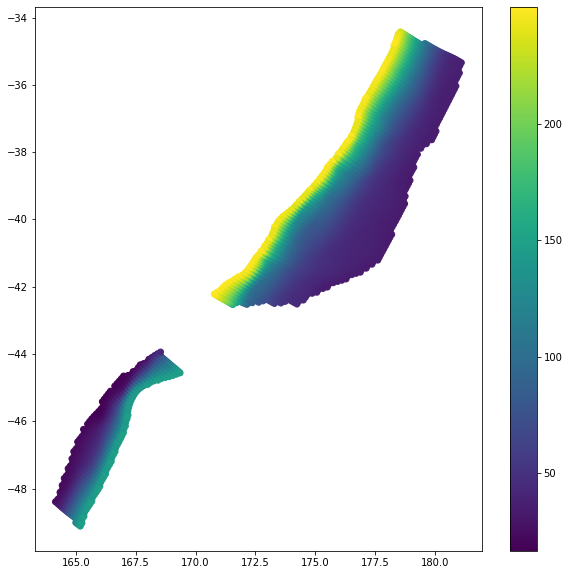

In [3]:
def view_grids(slabmodel=None):
    if slabmodel is None:
        slabmodel  = toml.load('../../components/slab_model/slab.ini')
    gridfile = {'hik': '../../'+slabmodel['hikurangi-slab']['file'],
            'puy': '../../'+slabmodel['puysegur-slab']['file']}
    # three models
    hx1,hy1,hz1,hx2,hy2,hz2,hx3,hy3,hz3 = read_grid(gridfile['hik'])
    px1,py1,pz1,px2,py2,pz2,px3,py3,pz3 = read_grid(gridfile['puy'], maxdepth=150)
    
    x2 = hx2+px2
    y2 = hy2+py2
    z2 = hz2+pz2
    
    # consider zmax=250
    #fig, axs = plt.subplots(1, 3, figsize=(8,3))
    #cb = axs[0].scatter(x1, y1, c=z1)
    #fig.colorbar(cb, ax =axs[0])
    #axs[1].scatter(x2, y2,c=z2)
    #axs[2].scatter(x3, y3,c=z3)
    #fig.tight_layout()
    plt.figure(figsize=(10,10))
    plt.scatter(x2,y2,c=z2)
    plt.colorbar()
    plt.show()

view_grids();

In [4]:
def write_ratefile(xx,yy,zz,rr, outfile):
    f = open(outfile,'w')
    f.write('lon,lat,dep,rate')
    for x,y,z,r in zip(xx,yy,zz,rr):
         f.write('\n%.4f,%.4f,%.3f,%.10f' %(x,y,z,r))
    f.close()

def generate_uniformrates(slabmodel, outfolder = '', filetag =''):
    gridfile = {'hik': '../../'+slabmodel['hikurangi-slab']['file'],
                'puy': '../../'+slabmodel['puysegur-slab']['file']}
    
    # three models
    hx1,hy1,hz1,hx2,hy2,hz2,hx3,hy3,hz3 = read_grid(gridfile['hik'])
    px1,py1,pz1,px2,py2,pz2,px3,py3,pz3 = read_grid(gridfile['puy'], maxdepth=150)
    
    # hw1,hw2,hw3 = slabmodel['hikurangi-slab']['weights']
    #pw1,pw2,pw3 = slabmodel['puysegur-slab']['weights']
    
    # lets handle hik
    n = len(hx1)
    tempo = [1/n]*n
    hikrate = [x/sum(tempo) for x in tempo]
    print(sum(hikrate))
    #hikrate1 = [r*hw1  for r in hikrate]
    #hikrate2 = [r*hw2  for r in hikrate]
    #hikrate3 = [r*hw3  for r in hikrate]
    #write_ratefile(hx1,hy1,hz1,hikrate1, outfolder+'hik-'+filetag+'_lay1.csv')
    write_ratefile(hx2,hy2,hz2,hikrate, outfolder+'hik-'+filetag+'_1depth.csv')
    #write_ratefile(hx3,hy3,hz3,hikrate3, outfolder+'hik-'+filetag+'_lay3.csv')
    
    n = len(px1)
    tempo = [1/n]*n
    puyrate = [x/sum(tempo) for x in tempo]
    print(sum(puyrate))
    #puyrate1 = [r*pw1  for r in puyrate]
    #puyrate2 = [r*pw2  for r in puyrate]
    #puyrate3 = [r*pw3  for r in puyrate]
    #write_ratefile(px1,py1,pz1,puyrate1, outfolder+'puy-'+filetag+'_lay1.csv')
    write_ratefile(px2,py2,pz2,puyrate, outfolder+'puy-'+filetag+'_1depth.csv')
    #write_ratefile(px3,py3,pz3,puyrate3, outfolder+'puy-'+filetag+'_lay3.csv')

slabmodel  = toml.load('../../components/slab_model/slab.ini')
generate_uniformrates(slabmodel, outfolder = 'files/processed-uniform/', filetag = 'slab-uniform')

1.000000000000136
0.9999999999999625
